# Risk Comparsion
## Demographic Comparisons

1. Get rankings of risk prediction scores from PCE and DDH
2. Look at their relative positions 
3. See how many of them are reclassified. 

## Project PCE thresholds DDH Risks

In [1]:
import pandas as pd
import numpy as np

ddh_risk_df = pd.read_csv('/Users/excenity/Documents/HSIP/Research/Longitudinal PCE/GitHub/Dynamic-DeepHit LRPP/DDH_pred_df.csv')
ddh_risk_df = ddh_risk_df.rename(columns = {'ddh_risk':'value'}).reset_index().rename(columns = {'index':'pt_id'})

In [2]:
ddh_risk_df

,pt_id,value,true_labels
0,0,0.002365,0
1,1,0.028489,0
2,2,0.014307,0
3,3,0.002745,0
4,4,0.106067,1
...,...,...,...
3108,3108,0.000873,0
3109,3109,0.004030,0
3110,3110,0.005151,0
3111,3111,0.001760,0


In [3]:
ddh_risk_df['risk_category'] = 'low'
ddh_risk_df.loc[(ddh_risk_df['value'] >= 0.05) & (ddh_risk_df['value'] < 0.075), 'risk_category'] = 'borderline'
ddh_risk_df.loc[(ddh_risk_df['value'] >= 0.075) & (ddh_risk_df['value'] < 0.2), 'risk_category'] = 'intermediate'
ddh_risk_df.loc[(ddh_risk_df['value'] >= 0.20), 'risk_category'] = 'high'

In [4]:
ddh_risk_df.risk_category.value_counts()/len(ddh_risk_df)

low             0.654353
intermediate    0.185031
high            0.085448
borderline      0.075169
Name: risk_category, dtype: float64

<AxesSubplot:>

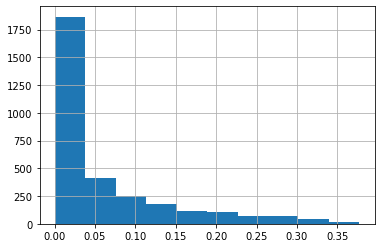

In [5]:
ddh_risk_df.value.hist()

## Ranking Comparison

In [6]:
pce_pred_df = pd.read_csv('/Users/excenity/Documents/HSIP/Research/Longitudinal PCE/GitHub/Dynamic-DeepHit LRPP/AUC + Risk Calculations/pce_pred_df.csv')

pce_pred_df_order = pce_pred_df.loc[:,['risk', 'risk_cat', 'true_label']].sort_values('risk').reset_index().rename(columns = {'index': 'id'}).reset_index().rename(columns = {'index': 'risk_order_pce'})

ddh_risk_df = ddh_risk_df.loc[ddh_risk_df.pt_id.isin(pce_pred_df_order['id']),]
ddh_risk_df_order = ddh_risk_df.loc[:,['value', 'risk_category']].sort_values('value').reset_index().rename(columns = {'index': 'id'}).reset_index().rename(columns = {'index': 'risk_order_ddh'})

pce_pred_df_order = pce_pred_df_order.rename(columns = {'risk_cat' : 'risk_cat_pce'})
ddh_risk_df_order = ddh_risk_df_order.rename(columns = {'risk_category' : 'risk_cat_ddh'})

risk_df_order = pd.merge(pce_pred_df_order, ddh_risk_df_order)

risk_df_order.to_csv('risk_df_order.csv', index = False)

## Race & Sex Category Comparison
Race Category:
1. White 
2. Black 

Sex Category:
1. Male
2. Female

In [7]:
df = pd.read_csv('/Volumes/fsmresfiles/PrevMed/Projects/MESA_RiskPred/LRPP data/LRPP_select.csv')
indecies_test = pd.read_csv('/Volumes/fsmresfiles/PrevMed/Projects/MESA_RiskPred/LRPP data/random_index_select.csv')
indecies_test.columns = ['index', 'label', 'study_index']
indecies_test = indecies_test.loc[indecies_test['study_index'] == True, :]
df = df.loc[df['id'].isin(indecies_test['index']), :]

# gender 
#df = df[['id', 'race', 'gender', 'age']].drop_duplicates().reset_index().reset_index().drop(columns=('index'))
#df['id'] = df['level_0']

# merge datasets 
risk_demo = pd.merge(risk_df_order, df[['id', 'race', 'gender', 'age']]) 

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/fsmresfiles/PrevMed/Projects/MESA_RiskPred/LRPP data/LRPP_select.csv'

In [8]:
from sklearn.metrics import roc_auc_score

In [9]:
df.loc[df['id']== 18]

NameError: name 'df' is not defined

### Race

In [37]:
risk_demo_white = risk_demo.loc[risk_demo['race'] == 1, :]
print('PCE AUC White:', roc_auc_score(risk_demo_white['true_label'], risk_demo_white['risk']))
print('DDH AUC White:', roc_auc_score(risk_demo_white['true_label'], risk_demo_white['value']))
risk_demo_white.to_csv(
    '/Users/excenity/Documents/HSIP/Research/Longitudinal PCE/Output/Demographic Comparison AUCs/risk_demo_white.csv', index = False)

PCE AUC White: 0.7646652065081351
DDH AUC White: 0.7976032540675844


In [38]:
risk_demo_black = risk_demo.loc[risk_demo['race'] == 2, :]
print('PCE AUC Black:', roc_auc_score(risk_demo_black['true_label'], risk_demo_black['risk']))
print('DDH AUC Black:', roc_auc_score(risk_demo_black['true_label'], risk_demo_black['value']))
risk_demo_black.to_csv(
    '/Users/excenity/Documents/HSIP/Research/Longitudinal PCE/Output/Demographic Comparison AUCs/risk_demo_black.csv', index = False)

PCE AUC Black: 0.9470879085596866
DDH AUC Black: 0.8990881654144995


### Sex

In [39]:
risk_demo_males = risk_demo.loc[risk_demo['gender'] == 1, :]
print('PCE AUC Males:', roc_auc_score(risk_demo_males['true_label'], risk_demo_males['risk']))
print('DDH AUC Males:', roc_auc_score(risk_demo_males['true_label'], risk_demo_males['value']))
risk_demo_males.to_csv(
    '/Users/excenity/Documents/HSIP/Research/Longitudinal PCE/Output/Demographic Comparison AUCs/risk_demo_males.csv', index = False)

PCE AUC Males: 0.8170097508125678
DDH AUC Males: 0.8645256152298406


In [40]:
risk_demo_females = risk_demo.loc[risk_demo['gender'] == 2, :]
print('PCE AUC Females:', roc_auc_score(risk_demo_females['true_label'], risk_demo_females['risk']))
print('DDH AUC Females:', roc_auc_score(risk_demo_females['true_label'], risk_demo_females['value']))
risk_demo_females.to_csv(
    '/Users/excenity/Documents/HSIP/Research/Longitudinal PCE/Output/Demographic Comparison AUCs/risk_demo_females.csv', index = False)

PCE AUC Females: 0.7953026234826872
DDH AUC Females: 0.7736616882027185


### Age

In [41]:
risk_demo['age_cat'] = '<60'
risk_demo.loc[risk_demo['age']>= 60, 'age_cat'] = '>=60'

In [42]:
risk_demo.age_cat.value_counts()

<60     1309
>=60     955
Name: age_cat, dtype: int64

In [43]:
risk_demo_lessthan60 = risk_demo.loc[risk_demo['age_cat'] == '<60', :]
print('PCE AUC <60:', roc_auc_score(risk_demo_lessthan60['true_label'], risk_demo_lessthan60['risk']))
print('DDH AUC <60:', roc_auc_score(risk_demo_lessthan60['true_label'], risk_demo_lessthan60['value']))
risk_demo_lessthan60.to_csv(
    '/Users/excenity/Documents/HSIP/Research/Longitudinal PCE/Output/Demographic Comparison AUCs/risk_demo_lessthan60.csv', index = False)

PCE AUC <60: 0.788483422693949
DDH AUC <60: 0.8028613633876792


In [44]:
risk_demo_morethan60 = risk_demo.loc[risk_demo['age_cat'] == '>=60', :]
print('PCE AUC >=60:', roc_auc_score(risk_demo_morethan60['true_label'], risk_demo_morethan60['risk']))
print('DDH AUC >=60:', roc_auc_score(risk_demo_morethan60['true_label'], risk_demo_morethan60['value']))
risk_demo_morethan60.to_csv(
    '/Users/excenity/Documents/HSIP/Research/Longitudinal PCE/Output/Demographic Comparison AUCs/risk_demo_morethan60.csv', index = False)

PCE AUC >=60: 0.8302626262626263
DDH AUC >=60: 0.841030303030303


## AUPRC Calculation

In [7]:
risk_df = pd.read_csv('risk_df_order.csv')

from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
import matplotlib.pyplot as plt

#### PCE

In [8]:
# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(risk_df.true_label, risk_df.risk)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.1946484545306418


#### DDH

In [9]:
precision, recall, thresholds = precision_recall_curve(risk_df.true_label, risk_df.value)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print(auc_precision_recall)

0.24998369117256053


In [ ]:
## 

---------------------
# Graveyard






## Risk Comparison
1. Scale risk scores to mean 

In [ ]:
len(pce_pred_df)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

risk_df = pd.concat([ddh_risk_df['value'], pce_pred_df['risk']], axis = 1)
risk_df.columns = ['ddh_risk', 'pce_risk']

scaler = MinMaxScaler()
risk_df_scale = scaler.fit_transform(risk_df.to_numpy())
risk_df_scale = pd.DataFrame(risk_df_scale)

risk_df_scale = risk_df_scale.reset_index().rename(columns = {'index':'id'})
risk_df_scale.columns = ['index','ddh_risk_scaled', 'pce_risk_scaled']

In [ ]:
risk_df_scale.mean()

In [ ]:
# calculate distance
risk_df_scale['ddh_risk_scaled_dist'] = (risk_df_scale['ddh_risk_scaled'] - risk_df_scale['ddh_risk_scaled'].mean())
risk_df_scale['pce_risk_scaled_dist'] = (risk_df_scale['pce_risk_scaled'] - risk_df_scale['pce_risk_scaled'].mean()) 

In [ ]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={"figure.figsize":(5, 5)})

In [ ]:
sns.scatterplot(data=risk_df_scale, x="pce_risk_scaled_dist", y="ddh_risk_scaled_dist")

In [ ]:
risk_df_scale.pce_risk_scaled. hist()

In [ ]:
risk_df_scale.ddh_risk_scaled.hist()